## cVAE convergence evaluation

GANs were not good enough. Switching to VAEs because convergence is demonstrable.

In [3]:
## blob names
cgan_model_name = 'cgan-model.h5'
cvae_simulated_data_name = 'cvae-example-data.pkl'
cvae_fit_stats_name = 'cvae-fit-stats.pkl'

In [16]:
## get data from storage 
!gsutil cp gs://gdax-dnn-tmp-1/cgan-model.h5 .
!gsutil cp gs://gdax-dnn-tmp-1/cvae-example-data.pkl .
!gsutil cp gs://gdax-dnn-tmp-1/cvae-fit-stats.pkl . 
!gsutil cp gs://gdax-dnn-tmp-1/cgan-data.pkl .

Copying gs://gdax-dnn-tmp-1/cgan-model.h5...
/ [1 files][  5.3 MiB/  5.3 MiB]                                                
Operation completed over 1 objects/5.3 MiB.                                      
Copying gs://gdax-dnn-tmp-1/cvae-example-data.pkl...
/ [1 files][  3.9 MiB/  3.9 MiB]                                                
Operation completed over 1 objects/3.9 MiB.                                      
Copying gs://gdax-dnn-tmp-1/cvae-fit-stats.pkl...
- [1 files][ 54.1 MiB/ 54.1 MiB]                                                
Operation completed over 1 objects/54.1 MiB.                                     
Copying gs://gdax-dnn-tmp-1/cgan-data.pkl...
/ [1 files][  1.5 GiB/  1.5 GiB]    9.4 MiB/s                                   
Operation completed over 1 objects/1.5 GiB.                                      


In [1]:
# missing dependencies 
import sys
! pip install --user tensorflow
! pip install --user keras
sys.path.append('/home/jupyter/.local/lib/python3.5/site-packages')

In [5]:
## load pickle files 
import pickle
with open(cvae_simulated_data_name, 'rb') as f:
    cvae_simulated_data = pickle.load(f)
#with open(cvae_fit_stats_name, 'rb') as f: ## does not pickle 
#    cvae_fit_stats = pickle.load(f)

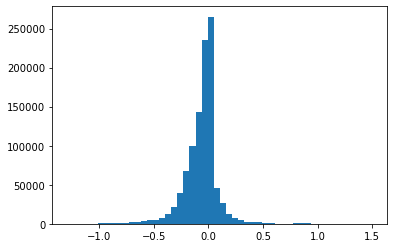

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

def hist(x, num_bins=50, **kwargs):
    plt.hist(x, num_bins, **kwargs)
    plt.show()
    pass

hist(cvae_simulated_data.flatten())

In [17]:
with open('cgan-data.pkl', 'rb') as f:
    cgan_data = pickle.load(f)

In [20]:
import numpy as np
import random 
idx = np.random.choice(cgan_data[0].shape[0], 1000)
x = cgan_data[0][idx,:]

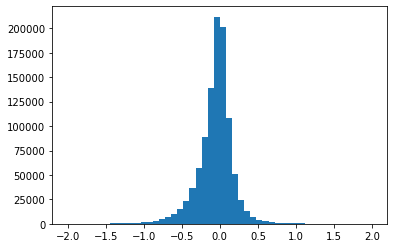

In [21]:
hist(x.flatten(), range=(-2, 2))